<ipython-input-1-0d4c4d0b1fb7>:22: RuntimeWarning: divide by zero encountered in scalar divide
  rhs = cos_ka * cosh_qb - (k**2 + q**2) / (2 * k * q) * sin_ka * sinh_qb
<ipython-input-1-0d4c4d0b1fb7>:22: RuntimeWarning: invalid value encountered in scalar multiply
  rhs = cos_ka * cosh_qb - (k**2 + q**2) / (2 * k * q) * sin_ka * sinh_qb


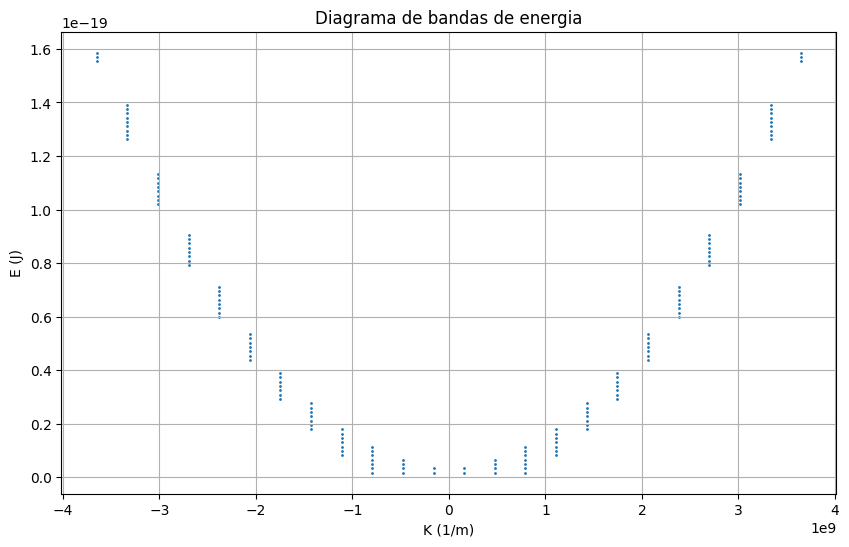

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definição dos parâmetros
m = 9.10938356e-31  # massa do elétron em kg
hbar = 1.0545718e-34  # constante de Planck reduzida em J.s
V0 = 1.0 * 1.60218e-19  # potencial em Joules (1 eV)
a = 1e-10  # largura da região sem potencial em metros
b = 1e-10  # largura da região com potencial em metros
T = a + b  # período do potencial

# Definindo a função de dispersão
def dispersion_relation(E, K, m, hbar, V0, a, b):
    k = np.sqrt(2 * m * E) / hbar
    q = np.sqrt(2 * m * (V0 - E)) / hbar
    cos_ka = np.cos(k * a)
    cosh_qb = np.cosh(q * b)
    sin_ka = np.sin(k * a)
    sinh_qb = np.sinh(q * b)

    lhs = np.cos(K * T)
    rhs = cos_ka * cosh_qb - (k**2 + q**2) / (2 * k * q) * sin_ka * sinh_qb

    return lhs - rhs

# Vetor de ondas K
K_values = np.linspace(-np.pi/T, np.pi/T, 100)
# Energias E
E_values = np.linspace(0, V0, 100)

# Calculando a equação de dispersão
solutions = []
for K in K_values:
    for E in E_values:
        value = dispersion_relation(E, K, m, hbar, V0, a, b)
        if np.abs(value) < 1e-2:  # tolerância para considerar uma solução
            solutions.append((K, E))

# Separando as soluções em K e E para plotar
K_solutions, E_solutions = zip(*solutions)

# Plotando as soluções
plt.figure(figsize=(10, 6))
plt.scatter(K_solutions, E_solutions, s=1)
plt.xlabel('K (1/m)')
plt.ylabel('E (J)')
plt.title('Diagrama de bandas de energia')
plt.grid(True)
plt.show()
